<a href="https://colab.research.google.com/github/frontloss/iNeuron-assignments/blob/master/Assignment_stats_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sympy import integrate ,Symbol, exp, factorial, latex
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt

### Problem statement 1
The marks awarded for an assignment set for a Year 8 class of 20 students were as
follows:
6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8. Calculate the mean, median and mode.

In [2]:
marks = [6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8]

def mean(marks):
    return sum(marks)/len(marks)

def median(marks):
    sorted_marks = sorted(marks)
    n = len(sorted_marks) 
    if n%2==0:
       return (sorted_marks[int(n/2)-1]+sorted_marks[int(n/2)])/2
    else:
       return sorted_marks[int(n/2)]

def mode(marks):
    count_dict = dict.fromkeys(set(marks),0)
    for mark in marks:
       count_dict[mark]+=1
    values = list(count_dict.values())
    keys = list(count_dict.keys())
    return keys[values.index(max(values))]
 
print(f'Mean:{mean(marks)},Median:{median(marks)},Mode:{mode(marks)}')

Mean:6.85,Median:7.0,Mode:7


###Problem Statement 2:
The number of calls from motorists per day for roadside service was recorded for a
particular month:
#####28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109

In [3]:
marks = [28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109]
print(f'Mean:{mean(marks)}, Median:{median(marks)}, Mode:{mode(marks)}')

Mean:107.51428571428572, Median:100, Mode:75


### Problem Statement 3:
The number of times I go to the gym in weekdays, are given below along with its
associated probability:
#####x = 0, 1, 2, 3, 4, 5
#####f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01
Calculate the mean no. of workouts in a week. Also evaluate the variance involved in it.

In [4]:
x = [0, 1, 2, 3, 4, 5]
fx = [0.09, 0.15, 0.40, 0.25, 0.10, 0.01]

def probability_mean(x,fx):
    return np.dot(x,fx)/len(x)
def probability_variance(x,fx):
    mu = probability_mean(x,fx)
    sigma_sqr = np.dot((x-mu)**2,fx)/len(x)
    return sigma_sqr 

print(f'Mean:{probability_mean(x,fx)},Variance:{probability_variance(x,fx)}')

Mean:0.35833333333333334,Variance:0.7395949074074074


### Problem Statement 4 & 9:
Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the 
##### PDF (d) = 20e−20(d−12.5), d ≥ 12.5. 
If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11 mm? What is your conclusion regarding the proportion of scraps?

In [5]:
x = Symbol('x')
def cdf(d):
  if d>12.5:
     return integrate(20*exp(-20*(x-12.5)),(x,(d,'oo')))
  else:
     return 0
scraped_proportion = cdf(12.6)
cdf_diameter_11 = cdf(11)
print(f'Portion that needs to be scrapped: {scraped_proportion}, CDF when diameter is 11: {cdf_diameter_11}')

Portion that needs to be scrapped: 0.135335283236609, CDF when diameter is 11: 0


Proportion of scraps reveal that if we were to make 100 drills into the aluminium sheet, only 14 drills would be of diameter greater than 12.6mm.

### Problem Statement 5:

A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6
chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?
Calculate the average value of this process. Also evaluate the standard deviation
associated with it.

Manufacturing of products occurs in large batches so the number of items is very high and probability of occurance of detective items is close to 0. So, the probability distribution curve follows poisson distribution.

In [6]:
def pmf(a,k):
   return exp(-a)*a**k/factorial(k)
faulty_rate = 0.3
sample = 6
a = sample*faulty_rate
probability = pmf(a,2)
mean = a
variance = a
std_dev = np.sqrt(variance)
print(f'probability of having 2 defective bulbs in a ramdom sample of 6: {probability},mean: {mean},standard deviation: {std_dev}')

probability of having 2 defective bulbs in a ramdom sample of 6: 0.267784198918970,mean: 1.7999999999999998,standard deviation: 1.3416407864998738


### Problem Statement 6:
Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to
solve 8 questions per day with a correction rate of 75%, while Barakha averages
around 12 questions per day with a correction rate of 45%. What is the probability
that each of them will solve 5 questions correctly? What happens in cases of 4 and 6
correct solutions? What do you infer from it? What are the two main governing
factors affecting their ability to solve questions correctly? Give a pictorial
representation of the same to validate your answer.

In [7]:
#For Gaurav
gv_n_questions = 8
correction_rate = 0.75
incorrect_rate = 1-correction_rate
a_gv = gv_n_questions*incorrect_rate
gv_prob_4_q_correct = pmf(a_gv,gv_n_questions-4)
gv_prob_5_q_correct = pmf(a_gv,gv_n_questions-5)
gv_prob_6_q_correct = pmf(a_gv,gv_n_questions-6)

#For Barakha
br_n_questions = 12
correction_rate = 0.45
incorrect_rate = 1-correction_rate
a_br = br_n_questions*incorrect_rate
br_prob_4_q_correct = pmf(a_br,br_n_questions-4)
br_prob_5_q_correct = pmf(a_br,br_n_questions-5)
br_prob_6_q_correct = pmf(a_br,br_n_questions-6)

print(f'Probability of 4 questions correctly for Gaurav:{gv_prob_4_q_correct} and 4 for Barakha:{br_prob_4_q_correct}')
print(f'Probability of 5 questions correctly for Gaurav:{gv_prob_5_q_correct} and 5 for Barakha:{br_prob_5_q_correct}')
print(f'Probability of 6 questions correctly for Gaurav:{gv_prob_6_q_correct} and 6 for Barakha:{br_prob_6_q_correct}')

Probability of 4 questions correctly for Gaurav:0.0902235221577418 and 4 for Barakha:0.121475132189648
Probability of 5 questions correctly for Gaurav:0.180447044315484 and 5 for Barakha:0.147242584472300
Probability of 6 questions correctly for Gaurav:0.270670566473225 and 6 for Barakha:0.156166377470622


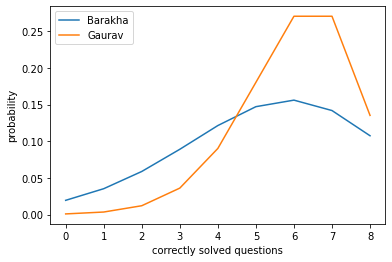

In [8]:
barakha = []
gaurav = []
for x in range(9):
    barakha.append(pmf(a_br,br_n_questions-x))
    gaurav.append(pmf(a_gv,gv_n_questions-x))
plt.plot(barakha)
plt.plot(gaurav)
plt.xlabel('correctly solved questions')
plt.ylabel('probability')
plt.legend(['Barakha','Gaurav'])

So, it can be inferred that probability of solving some x questions depends on two factors: **number of questions** and **correction rate**. Gaurav solves less no. of questions than Barakha but has very less incorrect solving rate than Barakha. So, we see that probability of solving no. of questions less than 4 correctly, Barakha has upper hand due to his/her ability of solving more no. of questions than Gaurav. But as the no. of questions to be solved correctly increase,Gaurav's probability increases drastically due to very low incorrect solving rate. We can clearly see the difference in probability between Gaurav and Barakha increasing drastically with more no. of correctly solved questions. 

### Problem Statement 7:

Customers arrive at a rate of 72 per hour to my shop. What is the probability of k
customers arriving in 4 minutes? a) 5 customers, b) not more than 3 customers, c)
more than 3 customers. Give a pictorial representation of the same to validate your
answer.

In [9]:
arrival_rate = 72/60
time = 4
a = arrival_rate*time
k = Symbol('k')
display(Math(f'Probability \; of \; k \; customers \; arriving \; in \; 4 \; minutes: p(k,4) = {latex(pmf(a,k))}'))

<IPython.core.display.Math object>

Probability of 5 customers in 4 minutes:  0.174747683643883
Probability of not more than 3 customers in 4 minutes:  0.294229916496564
Probability of more than 3 customers in 4 minutes:  0.705770083503436


Text(0, 0.5, 'probability')

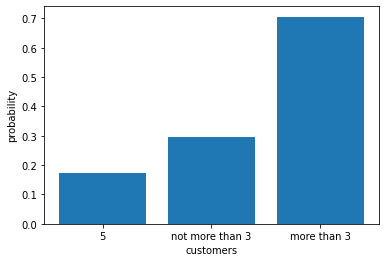

In [10]:
print('Probability of 5 customers in 4 minutes: ',pmf(a,5))
result = 0
for k in range(4):
    result+= pmf(a,k)
print('Probability of not more than 3 customers in 4 minutes: ',result)
print('Probability of more than 3 customers in 4 minutes: ',1-result)
plt.bar(['5','not more than 3','more than 3'],[pmf(a,5),result,1-result])
plt.xlabel('customers')
plt.ylabel('probability')

### Problem Statement 8:

I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make
reports, where I have the efficiency of entering 77 words per minute with 6 errors per
hour. What is the probability that I will commit 2 errors in a 455-word financial report?
What happens when the no. of words increases/decreases (in case of 1000 words,
255 words)?
How is the λ affected?
How does it influence the PMF?
Give a pictorial representation of the same to validate your answer.

Text(0, 0.5, 'probability')

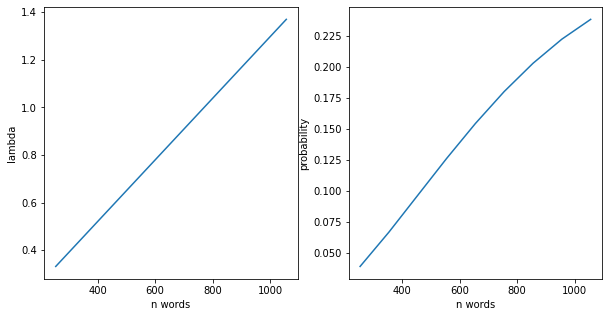

In [11]:
efficiency = 77
error_rate = 6/60
n_words_list = [255,355,455,555,655,755,855,955,1055]
lamda_list = []
probability_list = []
plt.figure(figsize=(10,5))
for n_words in n_words_list:
    avg_error_per_words = error_rate/efficiency
    lamda = avg_error_per_words*n_words
    lamda_list.append(lamda)
    probability_list.append(pmf(lamda,2))

plt.subplot(1,2,1)
plt.plot(n_words_list,lamda_list)
plt.xlabel('n words')
plt.ylabel('lambda')

plt.subplot(1,2,2)
plt.plot(n_words_list,probability_list)
plt.xlabel('n words')
plt.ylabel('probability')

### Problem Statement 10:
Please compute the following:
* P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
* Find the value z such that P(Z > z) = 0.05
* Find the value of z such that P(−z < Z < z) = 0.99

In [12]:
def P(x,mean=0,std_dev = 1):
   return exp(-(1/2)*((x-mean)/std_dev)**2)/(std_dev*np.sqrt(2*np.pi))

In [13]:
def find_z(value,probability_type):
    z = Symbol('z')
    solution_arr = []
    if probability_type=='P(Z>z)':
        Z = np.linspace(-4,4,100)
        for z1 in Z:
          soln = integrate(P(z),(z,z1,'oo'))
          solution_arr.append(soln.evalf())
    
    elif probability_type=='P(-z<Z<z)':
        Z = np.linspace(0,4,100) 
        for z1 in Z:
          soln = integrate(P(z),(z,-z1,z1))
          solution_arr.append(soln.evalf())
    else:
        print('Only P(Z>z) and P(-z<Z<z) probability type are allowed.')
    solution_arr = np.array(solution_arr)
    z = Z[np.argmin(np.abs(solution_arr-value))]
    return z

In [14]:
z = Symbol('z')
print('P(z>1.26) =',integrate(P(z),(z,1.26,'oo')).evalf())
print('P(z<-0.86) =',integrate(P(z),(z,'-oo',-0.86)).evalf())
print('P(z>-1.37) =',integrate(P(z),(z,-1.37,'oo')).evalf())
print('P(z<=-4.6) =',integrate(P(z),(z,'-oo',-4.6)).evalf())
print('For P(Z>z) = 0.05, z =',find_z(0.05,'P(Z>z)'))
print('For P(-z<Z<z) = 0.99, z =',find_z(0.99,'P(-z<Z<z)'))

P(z>1.26) = 0.103834681121300
P(z<-0.86) = 0.194894521251808
P(z>-1.37) = 0.914656549178033
P(z<=-4.6) = 2.11245470245799e-6
For P(Z>z) = 0.05, z = 1.6565656565656575
For P(-z<Z<z) = 0.99, z = 2.585858585858586


### Problem Statement 11:

The current flow in a copper wire follow a normal distribution with a mean of 10 mA
and a variance of 4 (mA)2.
What is the probability that a current measurement will exceed 13 mA? What is the
probability that a current measurement is between 9 and 11mA? Determine the
current measurement which has a probability of 0.98.

In [15]:
def find_current_range_centered_around_mean(value,mean,std_dev):
    current_range = []   
    solution_arr = []
    X = np.linspace(0,mean,100)
    x = Symbol('x')
    for i in X:
      soln = integrate(P(x,mean,std_dev),(x,mean-i,mean+i))
      solution_arr.append(soln.evalf())
      current_range.append((mean-i,mean+i))
    solution_arr = np.array(solution_arr)
    current_range = current_range[np.argmin(np.abs(solution_arr-value))]
    return current_range

In [16]:
mean = 10
variance = 4
std_dev = np.sqrt(variance)
x = Symbol('x')
print('P(x>13) =',integrate(P(x,mean,std_dev),(x,13,'oo')).evalf())
print('P(9<x<11) =',integrate(P(x,mean,std_dev),(x,9,11)).evalf())
print('Current measurement range having probability = 0.98:',find_current_range_centered_around_mean(0.98,mean,std_dev))

P(x>13) = 0.0668072012688580
P(9<x<11) = 0.382924922548026
Current measurement range having probability = 0.98: (5.353535353535354, 14.646464646464647)


### Problem Statement 12:

The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓ 0.0015 inch. What proportion of shafts are in sync with the specifications? If the process is centered so that the mean is equal to the target value of 0.2500, what proportion of shafts conform to the new specifications? What is your conclusion from this experiment?

![](https://i.postimg.cc/J4ZWvfMQ/stats.jpg)
Expection region

In [17]:
print('Proportion of shafts in sync with the given specification:',integrate(P(x,0.2508,0.0005),(x,0.2500-0.0015,0.2500+0.0015)).evalf())
result = integrate(P(x,0.2508,0.0005),(x,'-oo',0.2500)).evalf()+integrate(P(x,0.2500,0.0005),(x,0.2500,'oo')).evalf()
print('For mean = 0.2500, proportion of shafts conforming to the new specifications',result)

Proportion of shafts in sync with the given specification: 0.919241228311519
For mean = 0.2500, proportion of shafts conforming to the new specifications 0.554799291699553


We infer that for given specification of shafts, the probability of region obtained in sync with the original curve is greater than region with desired mean.  